In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer_support_data.csv')

Mounted at /content/drive


In [ ]:
df.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
print("Rows:",df.shape[0])
print("Columns:",df.shape[1])

Rows: 85907
Columns: 20


In [ ]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
Unique id,object
channel_name,object
category,object
Sub-category,object
Customer Remarks,object
Order_id,object
order_date_time,object
Issue_reported at,object
issue_responded,object
Survey_response_Date,object


In [ ]:
# Handle missing values

# 1️⃣ Numeric columns — fill with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# 2️⃣ Object (string/categorical) columns — fill with mode (most frequent value)
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    mode_value = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
    df[col].fillna(mode_value, inplace=True)

# 3️⃣ Check if any missing values remain
print("Missing values after imputation:")
print(df.isnull().sum())


/tmp/ipython-input-2964006937.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)
/tmp/ipython-input-2964006937.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Missing values after imputation:
Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
dtype: int64


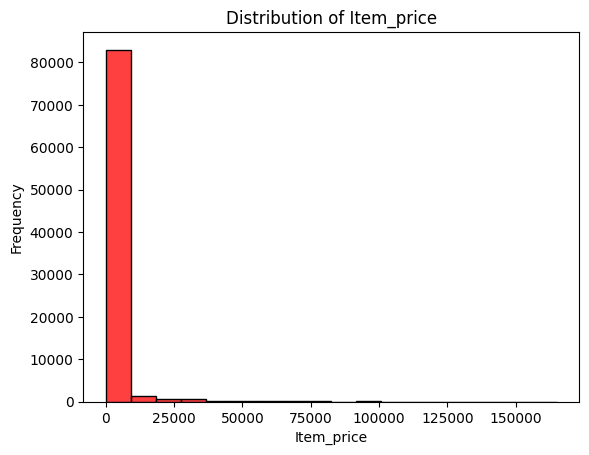

In [ ]:
sns.histplot(df['Item_price'],color='red',edgecolor='black')
plt.xlabel('Item_price')
plt.ylabel('Frequency')
plt.title('Distribution of Item_price')
plt.show()

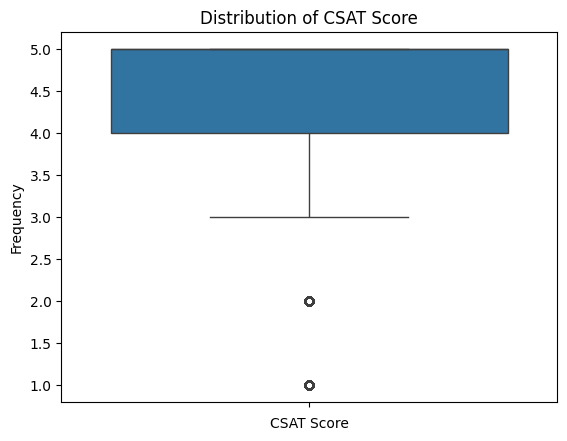

In [ ]:
sns.boxplot(df['CSAT Score'])
plt.xlabel('CSAT Score')
plt.ylabel('Frequency')
plt.title('Distribution of CSAT Score')
plt.show()

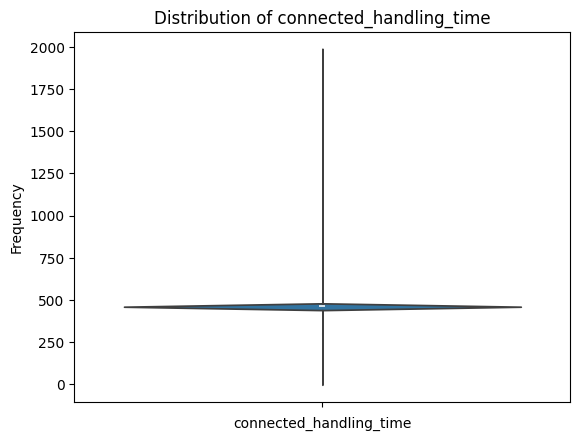

In [ ]:
sns.violinplot(df['connected_handling_time'])
plt.xlabel('connected_handling_time')
plt.ylabel('Frequency')
plt.title('Distribution of connected_handling_time')
plt.show()

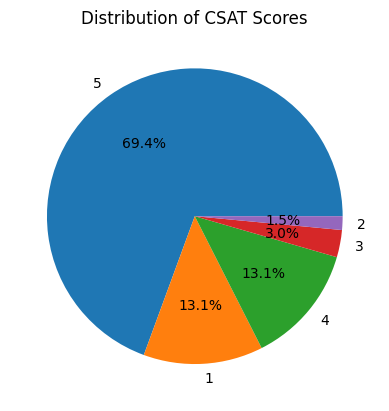

In [ ]:
csat=df['CSAT Score'].value_counts()
plt.pie(csat,labels=csat.index,autopct='%1.1f%%')
plt.title('Distribution of CSAT Scores')
plt.show()

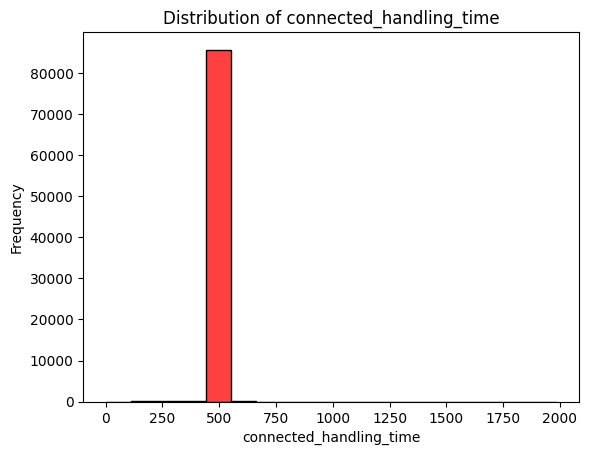

In [ ]:
#“What is the spread of connected_handling_time values?” → Histogram + boxplo
sns.histplot(df['connected_handling_time'],color='red',edgecolor='black')
plt.xlabel('connected_handling_time')
plt.ylabel('Frequency')
plt.title('Distribution of connected_handling_time')
plt.show()

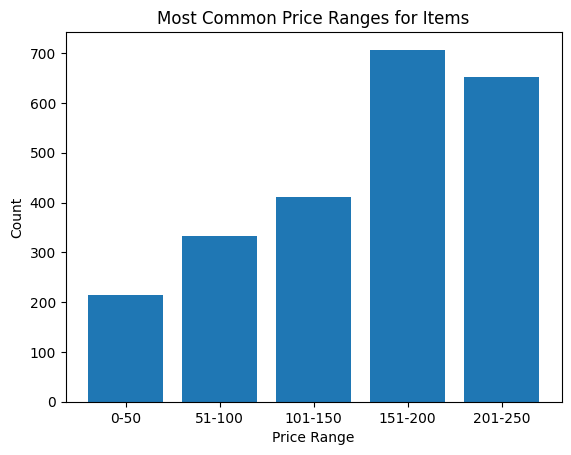

In [ ]:
#What are the most common price ranges for items?” → Binned bar chart
price_bins = [0, 50, 100, 150, 200, 250]
price_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', ]
df['Price Range'] = pd.cut(df['Item_price'], bins=price_bins, labels=price_labels)
price_range_counts = df['Price Range'].value_counts().sort_index()
plt.bar(price_range_counts.index, price_range_counts.values)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Most Common Price Ranges for Items')
plt.show()

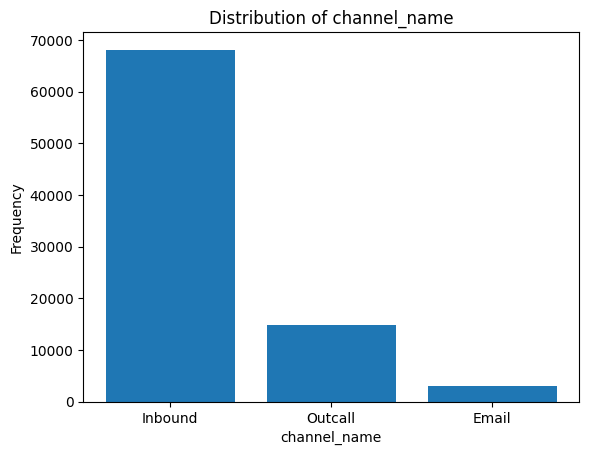

In [ ]:
cc=df['channel_name'].value_counts()
plt.bar(cc.index,cc.values)
plt.xlabel('channel_name')
plt.ylabel('Frequency')
plt.title('Distribution of channel_name')
plt.show()

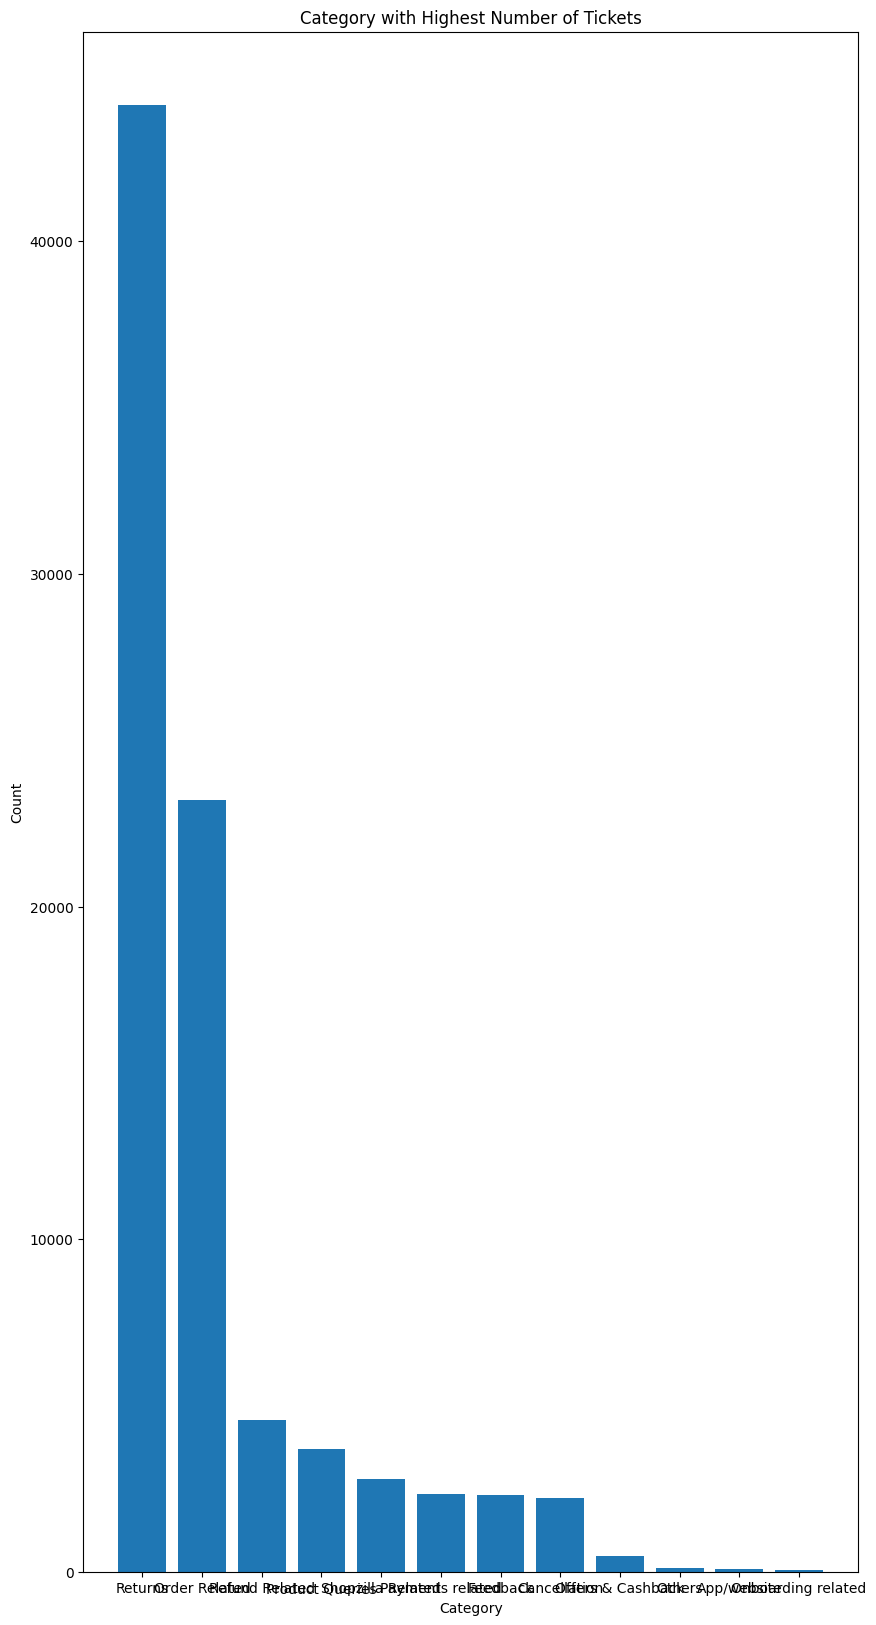

In [ ]:
#“Which category has the highest number of tickets?” → Bar chart (sorted)
category_counts = df['category'].value_counts()
plt.figure(figsize=(10, 20))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category with Highest Number of Tickets')
plt.show()

Text(0.5, 1.0, 'Distribution of Tickets by Agent Shift')

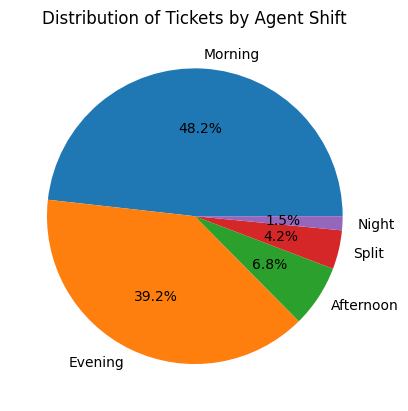

In [ ]:
# “Show me the distribution of tickets by Agent Shift.” → Pie chart
agent_shift_counts = df['Agent Shift'].value_counts()
plt.pie(agent_shift_counts, labels=agent_shift_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Tickets by Agent Shift')

<BarContainer object of 10 artists>

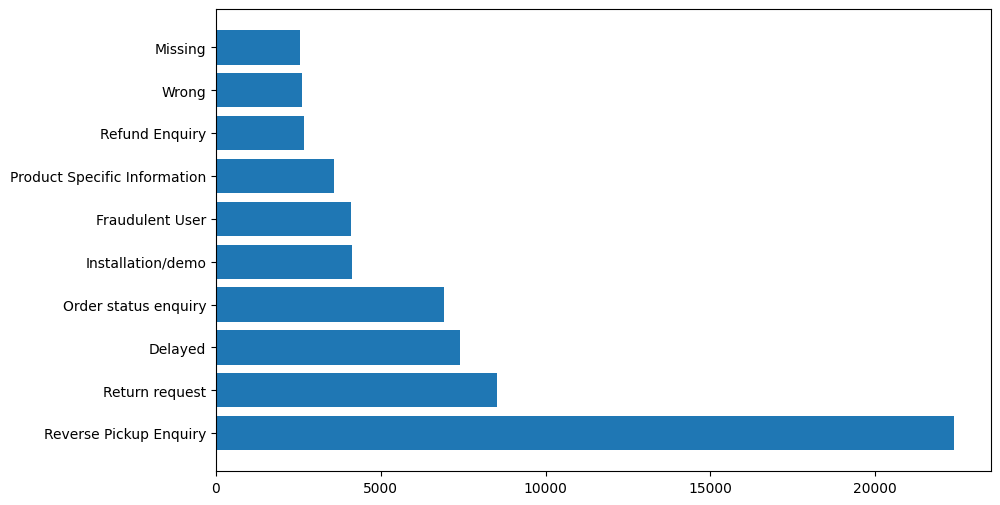

In [ ]:
#“What are the top 10 Sub-category values?” → Horizontal bar chart
sub_category_counts = df['Sub-category'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.barh(sub_category_counts.index, sub_category_counts.values)

<BarContainer object of 5 artists>

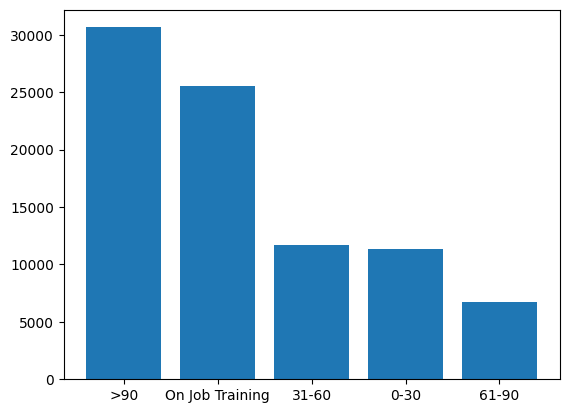

In [ ]:
# “How many tickets belong to each Tenure Bucket?” → Bar chart
tenure_bucket_counts = df['Tenure Bucket'].value_counts()
plt.bar(tenure_bucket_counts.index, tenure_bucket_counts.values)

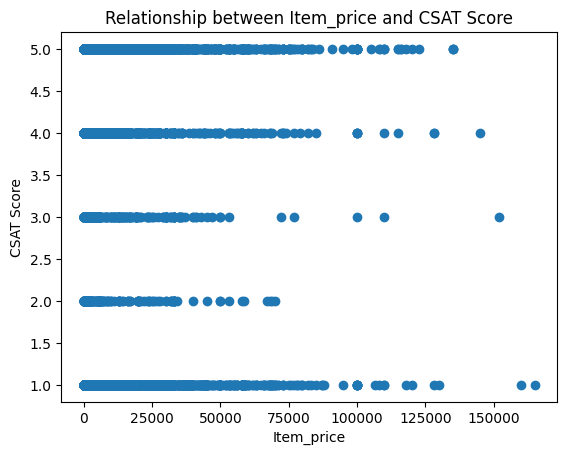

In [ ]:
#“Is there a relationship between Item_price and CSAT Score?” → Scatter plot
plt.scatter(df['Item_price'], df['CSAT Score'])
plt.xlabel('Item_price')
plt.ylabel('CSAT Score')
plt.title('Relationship between Item_price and CSAT Score')
plt.show()


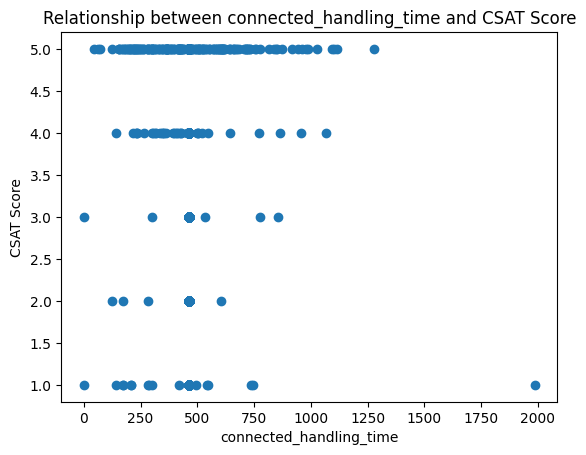

In [ ]:
#“How does connected_handling_time affect CSAT Score?” → Scatter plot + trend line
plt.scatter(df['connected_handling_time'], df['CSAT Score'])
plt.xlabel('connected_handling_time')
plt.ylabel('CSAT Score')
plt.title('Relationship between connected_handling_time and CSAT Score')
plt.show()


Text(0, 0.5, 'connected_handling_time')

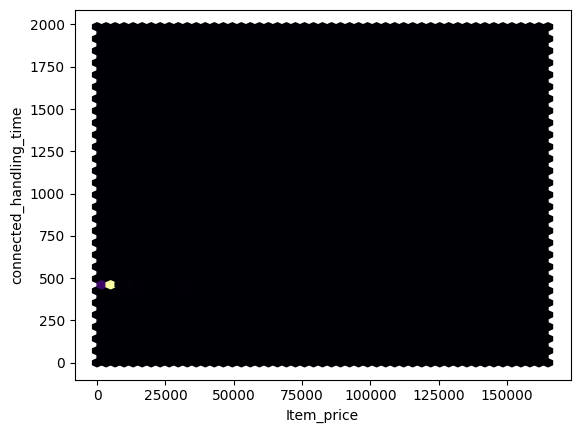

In [ ]:
#“Show me density or clusters of Item_price vs connected_handling_time.” → Hexbin plot
plt.hexbin(df['Item_price'], df['connected_handling_time'], gridsize=50, cmap='inferno')
plt.xlabel('Item_price')
plt.ylabel('connected_handling_time')

<BarContainer object of 3 artists>

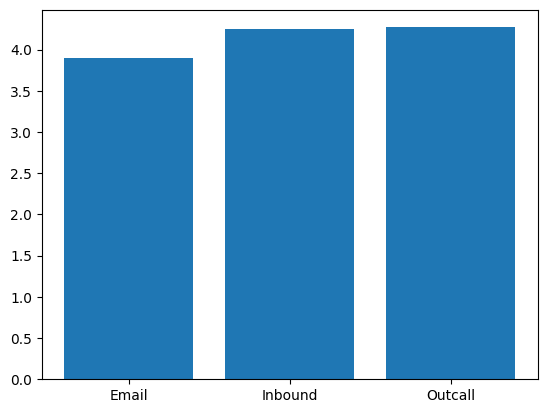

In [ ]:
#“What is the average CSAT Score per channel_name?” → Grouped bar chart
channel_csat_mean = df.groupby('channel_name')['CSAT Score'].mean()
plt.bar(channel_csat_mean.index, channel_csat_mean.values)

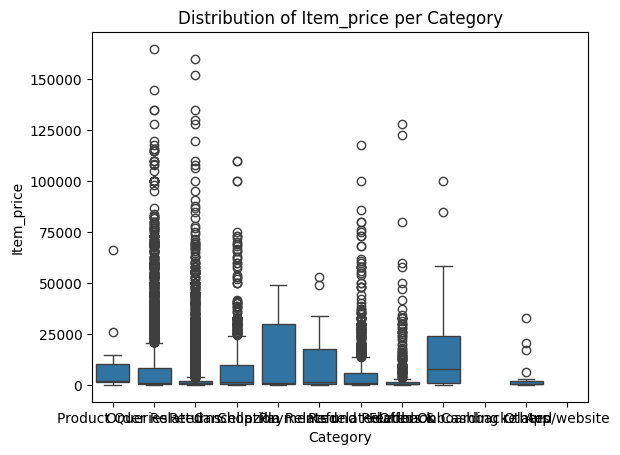

In [ ]:
#“Show distribution of Item_price per category.” → Multiple boxplots
import matplotlib.pyplot as plt
sns.boxplot(x='category', y='Item_price', data=df)
plt.xlabel('Category')
plt.ylabel('Item_price')
plt.title('Distribution of Item_price per Category')
plt.show()

Text(0.5, 1.0, 'Distribution of connected_handling_time by Agent Shift')

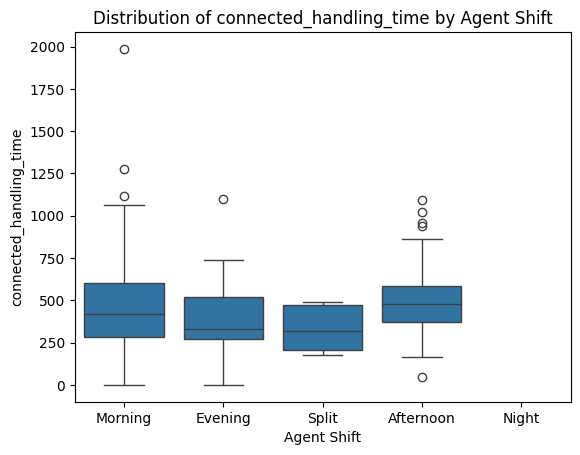

In [ ]:
# “How does connected_handling_time vary by Agent Shift?” → Boxplot
sns.boxplot(x='Agent Shift', y='connected_handling_time', data=df)
plt.xlabel('Agent Shift')
plt.ylabel('connected_handling_time')
plt.title('Distribution of connected_handling_time by Agent Shift')

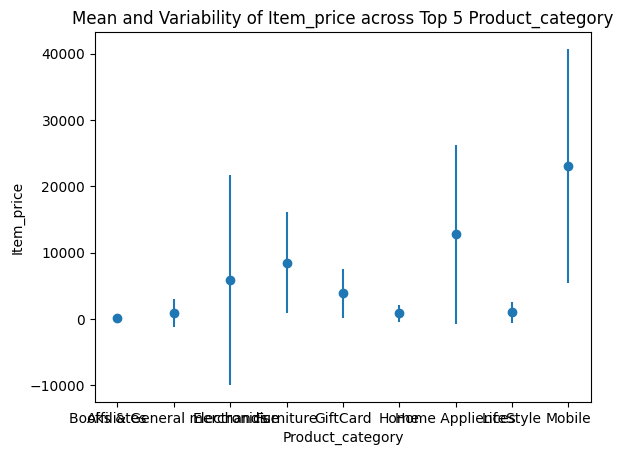

In [ ]:
#“Show mean and variability of Item_price across top 5 Product_category.” → Error bar plot
top_5_categories = df['Product_category'].value_counts().head(5).index
category_means = df.groupby('Product_category')['Item_price'].mean()
category_std_devs = df.groupby('Product_category')['Item_price'].std()
plt.errorbar(x=category_means.index, y=category_means.values, yerr=category_std_devs.values, fmt='o')
plt.xlabel('Product_category')
plt.ylabel('Item_price')
plt.title('Mean and Variability of Item_price across Top 5 Product_category')
plt.show()

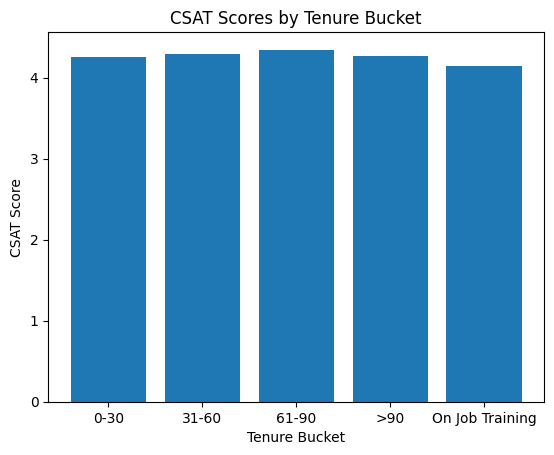

In [ ]:
# “How do CSAT scores differ across Tenure Bucket?” → Bar chart
tenure_csat_mean = df.groupby('Tenure Bucket')['CSAT Score'].mean()
plt.bar(tenure_csat_mean.index, tenure_csat_mean.values)
plt.xlabel('Tenure Bucket')
plt.ylabel('CSAT Score')
plt.title('CSAT Scores by Tenure Bucket')
plt.show()

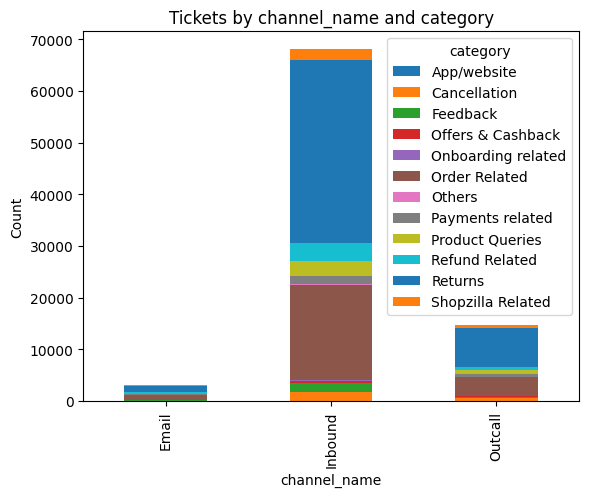

In [ ]:
#“Show the number of tickets by channel_name and category together.” → Stacked bar chart
channel_category_counts = df.groupby(['channel_name', 'category']).size().unstack(fill_value=0)
channel_category_counts.plot(kind='bar', stacked=True)
plt.xlabel('channel_name')
plt.ylabel('Count')
plt.title('Tickets by channel_name and category')
plt.show()

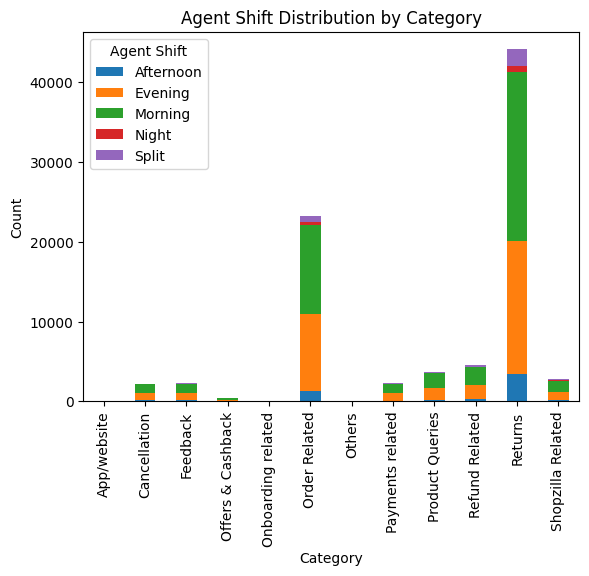

In [ ]:
#“How does Agent Shift distribution differ across category?” → Stacked bar or grouped bar chart
category_shift_counts = df.groupby(['category', 'Agent Shift']).size().unstack(fill_value=0)
category_shift_counts.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Agent Shift Distribution by Category')
plt.show()

/tmp/ipython-input-3758398154.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date_time'] = pd.to_datetime(df['order_date_time'])


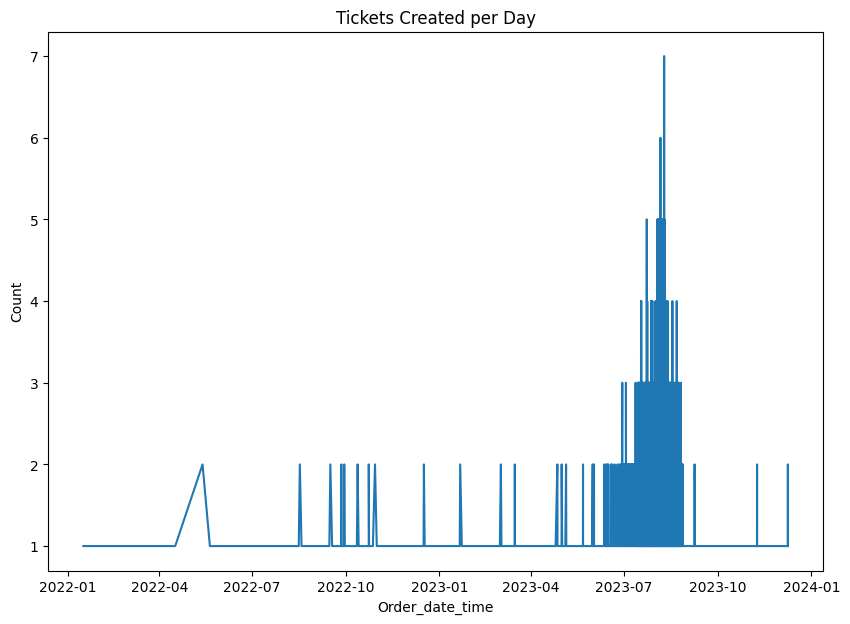

In [11]:
#“How many tickets were created per day?” → Line plot
plt.figure(figsize=(10, 7))
df['order_date_time'] = pd.to_datetime(df['order_date_time'])
daily_ticket_counts = df.groupby('order_date_time').size()
plt.plot(daily_ticket_counts.index, daily_ticket_counts.values)
plt.xlabel('Order_date_time')
plt.ylabel('Count')
plt.title('Tickets Created per Day')
plt.show()

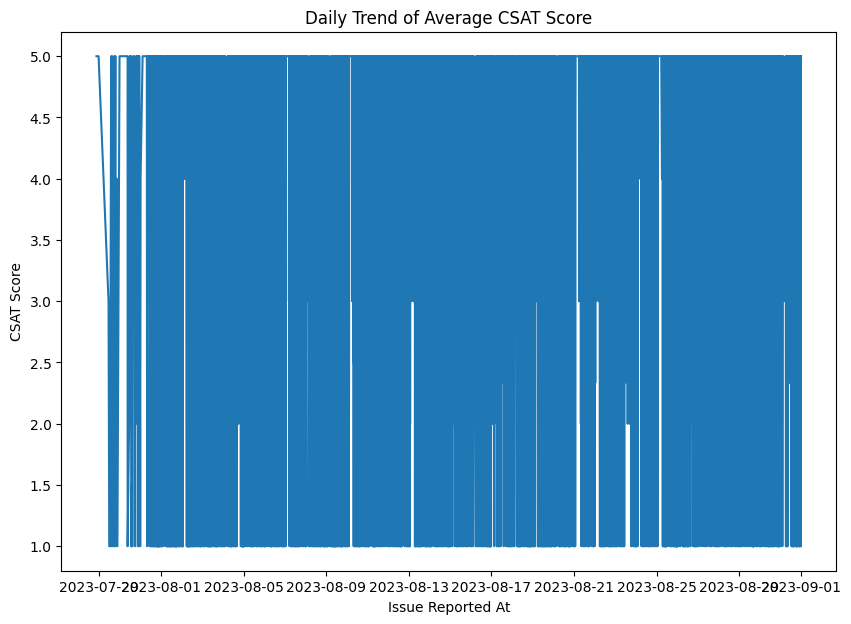

In [10]:
#“Show daily trend of average CSAT Score.” → Line plot (rolling average optional)
plt.figure(figsize=(10, 7))
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'])
daily_csat_mean = df.groupby('Issue_reported at')['CSAT Score'].mean()
plt.plot(daily_csat_mean.index, daily_csat_mean.values)
plt.xlabel('Issue Reported At')
plt.ylabel('CSAT Score')
plt.title('Daily Trend of Average CSAT Score')
plt.show()

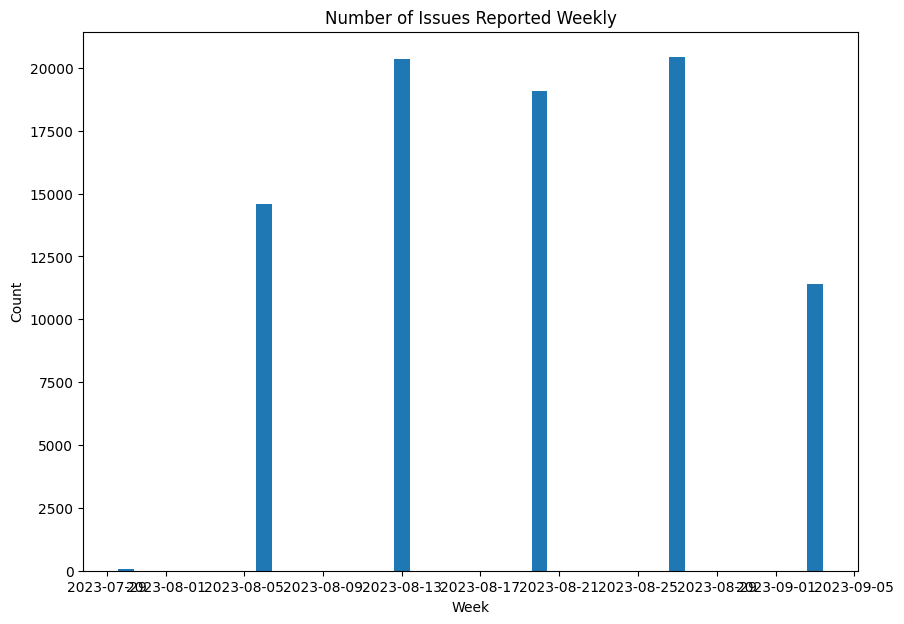

In [9]:
#“Plot number of issues reported weekly.” → Bar chart (aggregated)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
weekly_issue_counts = df.groupby(pd.Grouper(key='Issue_reported at', freq='W')).size()
plt.bar(weekly_issue_counts.index, weekly_issue_counts.values)
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Number of Issues Reported Weekly')
plt.show()

/tmp/ipython-input-4105159230.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ticket_counts = df.groupby(pd.Grouper(key='Issue_reported at', freq='M')).size()


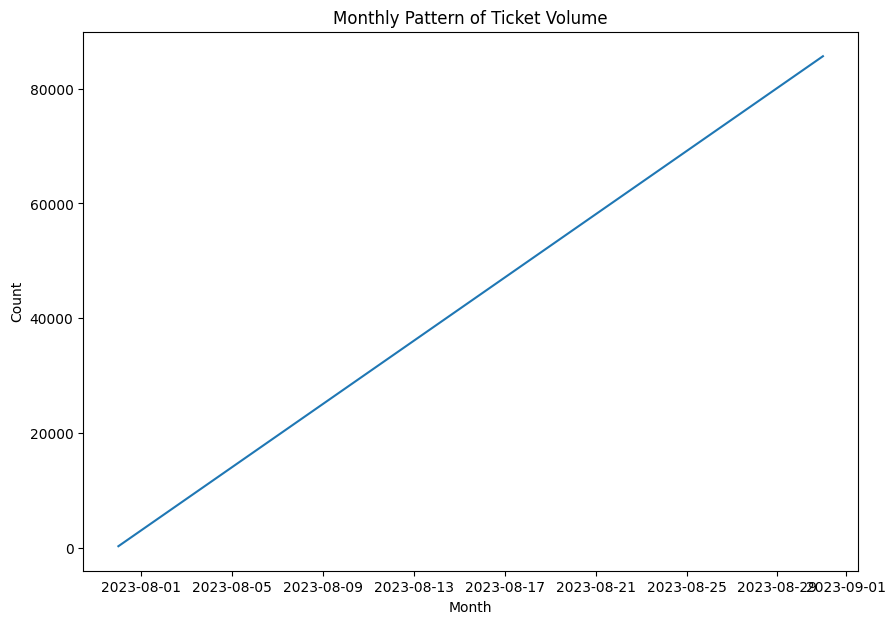

In [4]:
plt.figure(figsize=(10, 7))
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
monthly_ticket_counts = df.groupby(pd.Grouper(key='Issue_reported at', freq='M')).size()
plt.plot(monthly_ticket_counts.index, monthly_ticket_counts.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Pattern of Ticket Volume')
plt.show()

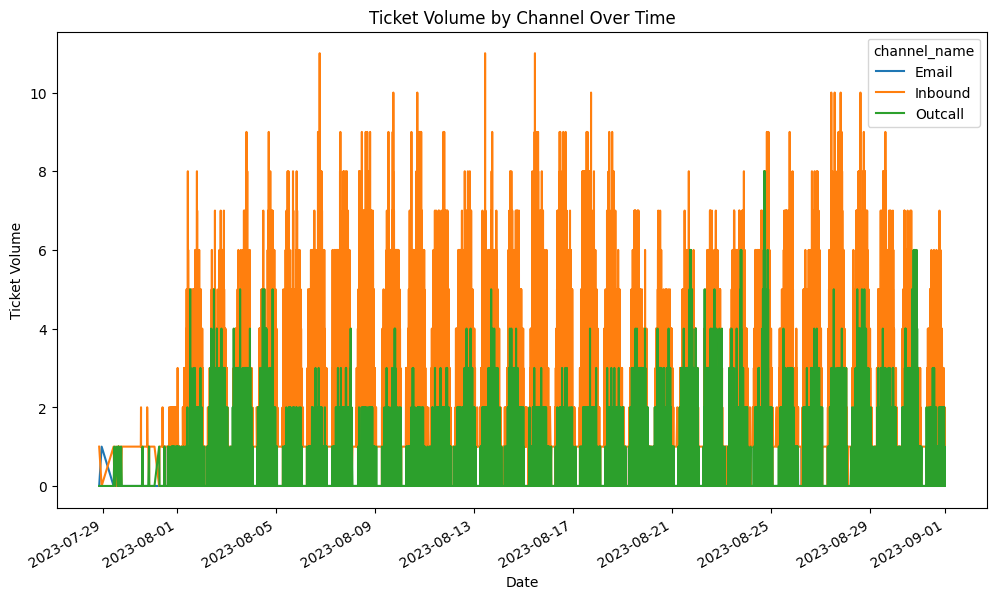

In [5]:
import matplotlib.pyplot as plt
channel_time_counts = df.groupby(['Issue_reported at', 'channel_name']).size().unstack(fill_value=0)
channel_time_counts.plot(figsize=(12, 7))
plt.xlabel('Date')
plt.ylabel('Ticket Volume')
plt.title('Ticket Volume by Channel Over Time')
plt.show()

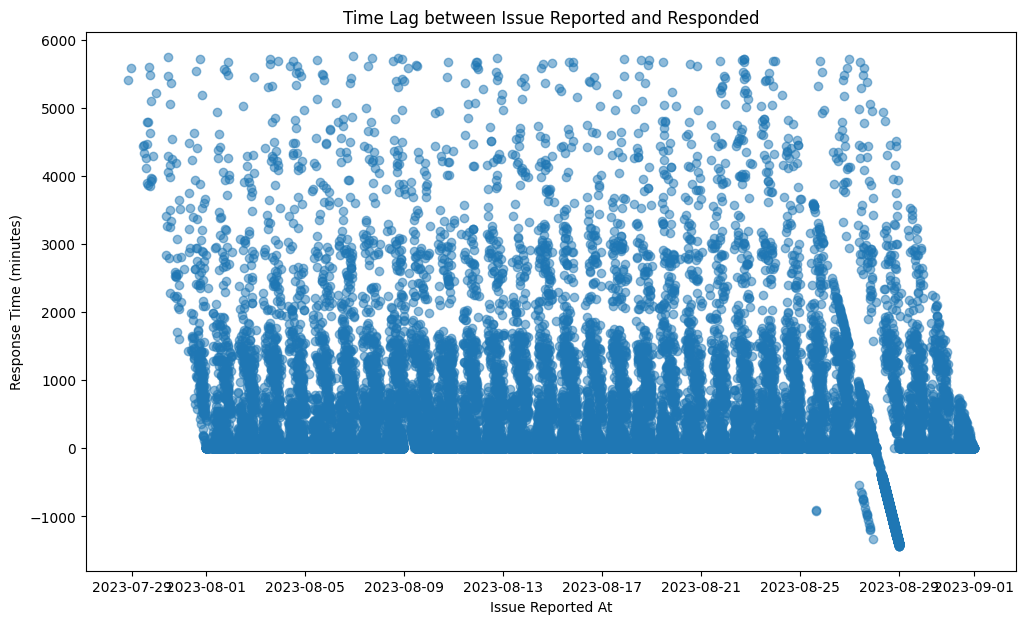

In [6]:
#“Show the time lag between Issue_reported at and issue_responded.” → Line or scatter plot (response time trend)
import matplotlib.pyplot as plt

df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M')
df['response_time'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60  # in minutes

plt.figure(figsize=(12, 7))
plt.scatter(df['Issue_reported at'], df['response_time'], alpha=0.5)
plt.xlabel('Issue Reported At')
plt.ylabel('Response Time (minutes)')
plt.title('Time Lag between Issue Reported and Responded')
plt.show()

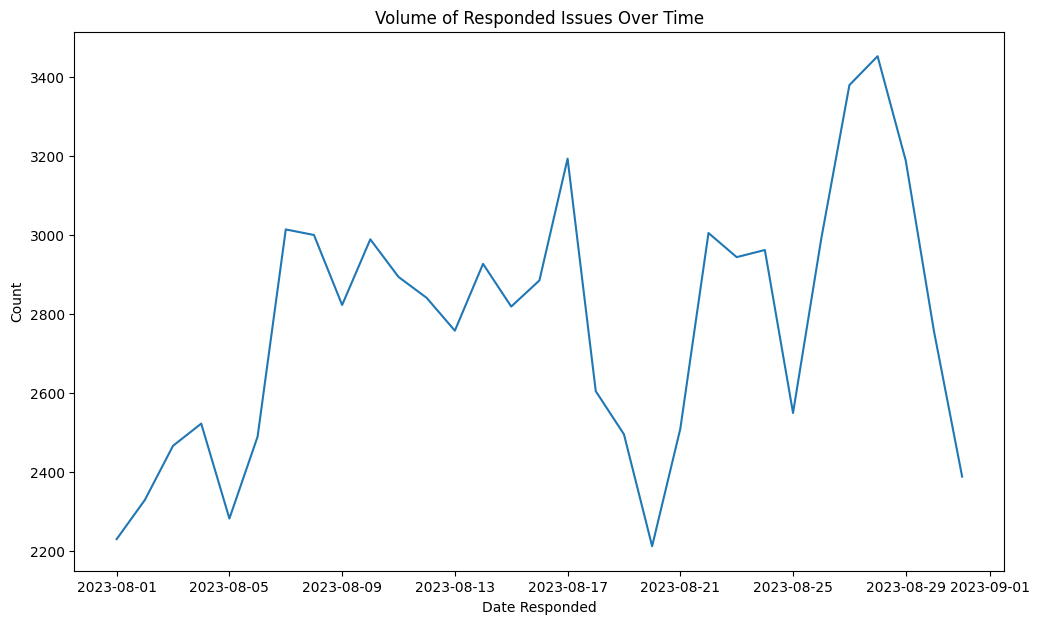

In [7]:
plt.figure(figsize=(12, 7))
df_responded = df.dropna(subset=['issue_responded'])
responded_counts = df_responded.groupby(pd.Grouper(key='issue_responded', freq='D')).size()
plt.plot(responded_counts.index, responded_counts.values)
plt.xlabel('Date Responded')
plt.ylabel('Count')
plt.title('Volume of Responded Issues Over Time')
plt.show()

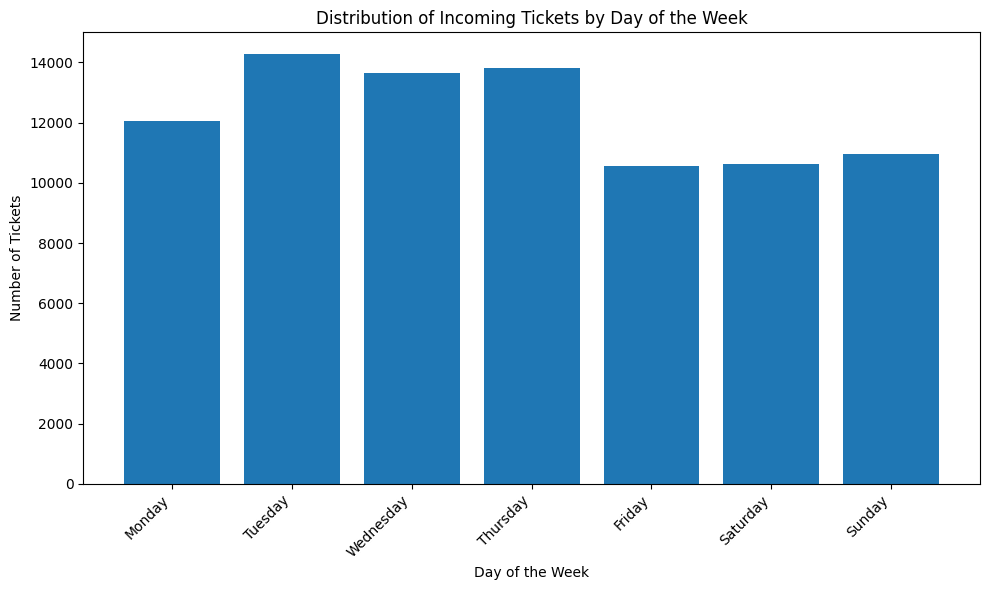

In [8]:
import matplotlib.pyplot as plt

df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'])
df['day_of_week'] = df['Issue_reported at'].dt.day_name()
daily_counts = df['day_of_week'].value_counts()

# Order the days of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = daily_counts.reindex(order)

plt.figure(figsize=(10, 6))
plt.bar(daily_counts.index, daily_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tickets')
plt.title('Distribution of Incoming Tickets by Day of the Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()